ε2 = 0.436, Φ2 = 1.571 rad
ε3 = 0.000, Φ3 = 0.941 rad


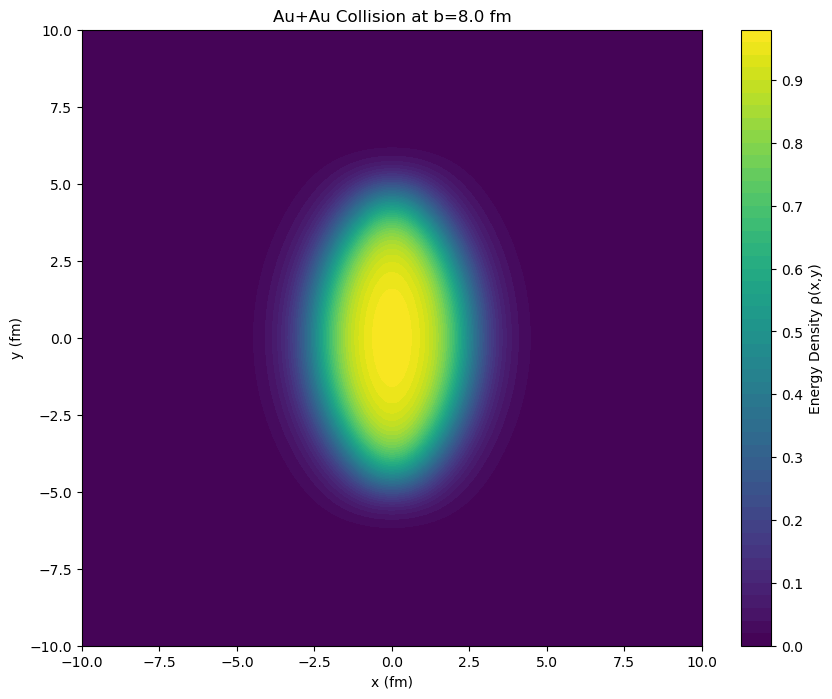

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
R0 = 6.38  # fm (Au核半径)
a = 0.535  # fm (表面厚度)
b = 8.0    # fm (碰撞参数)
A = 197    # 核子数

# Woods-Saxon核厚度函数
def woods_saxon(r):
    return 1 / (1 + np.exp((r - R0) / a))

# 重叠函数定义
def overlap_function(x, y, b):
    r1 = np.sqrt((x + b/2)**2 + y**2)
    r2 = np.sqrt((x - b/2)**2 + y**2)
    return woods_saxon(r1) * woods_saxon(r2)

# 计算偏心率和事件平面角度
def calculate_epsilon_n(rho_func, n, x_range=(-10, 10), y_range=(-10, 10), num_points=200):
    x = np.linspace(x_range[0], x_range[1], num_points)
    y = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2)
    Phi = np.arctan2(Y, X)
    
    # 计算积分
    rho = rho_func(X, Y)
    numerator_real = np.sum(R**n * np.cos(n * Phi) * rho)
    numerator_imag = np.sum(R**n * np.sin(n * Phi) * rho)
    denominator = np.sum(R**n * rho)
    
    epsilon_n = np.sqrt(numerator_real**2 + numerator_imag**2) / denominator
    phi_n = np.arctan2(numerator_imag, numerator_real) / n  # 事件平面角度Φ_n
    
    return epsilon_n, phi_n

# 计算ε2和ε3
epsilon_2, phi_2 = calculate_epsilon_n(lambda x, y: overlap_function(x, y, b), n=2)
epsilon_3, phi_3 = calculate_epsilon_n(lambda x, y: overlap_function(x, y, b), n=3)

print(f"ε2 = {epsilon_2:.3f}, Φ2 = {phi_2:.3f} rad")
print(f"ε3 = {epsilon_3:.3f}, Φ3 = {phi_3:.3f} rad")

# 可视化能量密度分布
x = np.linspace(-10, 10, 200)
y = np.linspace(-10, 10, 200)
X, Y = np.meshgrid(x, y)
rho = overlap_function(X, Y, b)

plt.figure(figsize=(10, 8))
plt.contourf(X, Y, rho, levels=50, cmap='viridis')
plt.colorbar(label='Energy Density ρ(x,y)')
plt.xlabel('x (fm)')
plt.ylabel('y (fm)')
plt.title(f'Au+Au Collision at b={b} fm')
plt.show()

### 粒子的象限分布角度

In [5]:
# 示例数据：N个粒子的 px 和 py 数组
px_array = np.array([1.0, -1.0, 0.5, -0.5])  # GeV/c
py_array = np.array([1.0, 1.0, -0.5, -0.5])   # GeV/c

# 计算所有粒子的 phi
phi_array = np.arctan2(py_array, px_array)
print("粒子方位角（rad）:", phi_array)
print("转换为角度（°）:", np.degrees(phi_array))

粒子方位角（rad）: [ 0.78539816  2.35619449 -0.78539816 -2.35619449]
转换为角度（°）: [  45.  135.  -45. -135.]


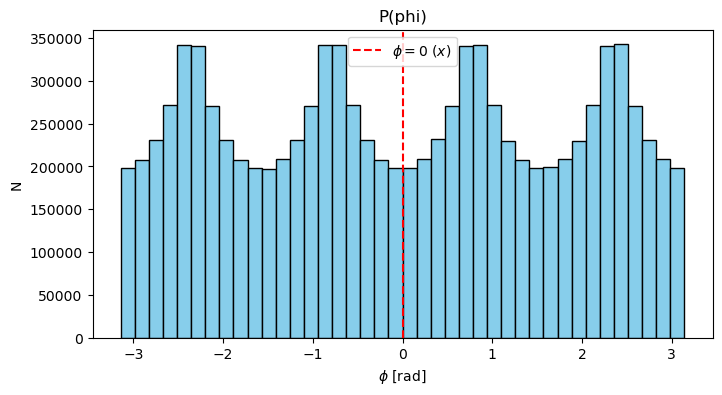

In [8]:
import matplotlib.pyplot as plt

# 生成模拟数据（1000个粒子，phi均匀分布）
np.random.seed(42)
px = np.random.uniform(-1, 1, 10000000)
py = np.random.uniform(-1, 1, 10000000)
phi = np.arctan2(py, px)

# 绘制直方图
plt.figure(figsize=(8, 4))
plt.hist(phi, bins=40, range=(-np.pi, np.pi), color='skyblue', edgecolor='black')
plt.xlabel("$\phi$ [rad]")
plt.ylabel("N")
plt.title("P(phi)")
plt.axvline(0, color='red', linestyle='--', label="$\phi=0$ ($x$)")
plt.legend()
plt.show()